<a href="https://colab.research.google.com/github/Venkatakousik/FML/blob/main/L1%26L2_on_Multivariate_Regression_on_Company_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
company = pd.read_csv("/content/drive/MyDrive/Datasets/Company_data.csv")

In [ ]:
company.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

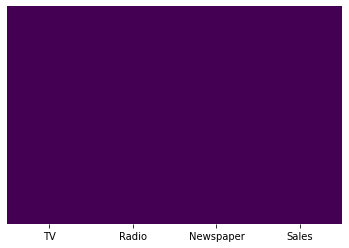

In [ ]:
sns.heatmap(company.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
company.shape

(200, 4)

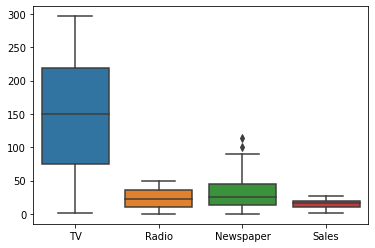

In [ ]:
sns.boxplot(data=company)
plt.show()

In [ ]:
#Finding Quartiles 1st and 3rd
q1 = company['Newspaper'].quantile(0.25)
q3 = company['Newspaper'].quantile(0.75)
qd = q3-q1
print

<function print>

In [ ]:
up = q3 + 1.5*qd
down = q1 - 1.5*qd
print(up,down)

93.625 -35.775000000000006


In [ ]:
data = company['Newspaper']
outliers =[]
for i in data:
  if i>up:
    outliers.append(i)
print(outliers)

[114.0, 100.9]


In [ ]:
company['Newspaper'] = company['Newspaper'].replace(outliers,company['Newspaper'].mean())

In [ ]:
X = company.drop('Sales',axis=1).values
y = company['Sales'].values
print(X.shape,y.shape)
y = y.reshape(-1,1)

y.shape

(200, 3) (200,)


(200, 1)

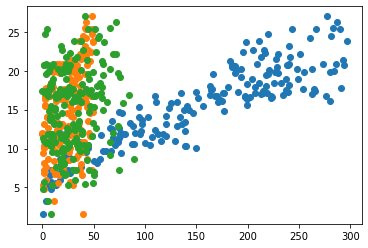

In [ ]:

#plotting all the values of each column on x-axis and y on y-axis
plt.scatter(X[:,0],y)
plt.scatter(X[:,1],y)
plt.scatter(X[:,2],y)
plt.show()

In [ ]:
#Splitting the data into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Training

In [ ]:
y_predict = reg.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.2198525968986116
MSE : 2.693788050620906
RMSE : 1.6412763480355483
R2_SCORE : 0.9009071961640385


Testing

In [ ]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.408420943286833
MSE : 2.8751118631089665
RMSE : 1.69561548209167
R2_SCORE : 0.9120300871982301


In [ ]:
#Import Lasso 
#L1 Regularisation
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.1)
reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.2204725465244948
MSE : 2.6938400670908687
RMSE : 1.6412921943063241
R2_SCORE : 0.9009052827032327


In [ ]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.409601024629882
MSE : 2.8791465619546535
RMSE : 1.6968048096214996
R2_SCORE : 0.9119066373560898


In [ ]:
#Import Ridge
#L2 Regularisation
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)
reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.2198528131484168
MSE : 2.6937880506379557
RMSE : 1.6412763480407422
R2_SCORE : 0.9009071961634113


In [ ]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.4084222589539213
MSE : 2.8751168501508353
RMSE : 1.6956169526608407
R2_SCORE : 0.9120299346095103
